In [1]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import matplotlib.pyplot as plt

# Replace 'dem1.tif' and 'dem2.tif' with the paths to your DEM files
dem1 = "Missoula4Brian/topo/lakemissoula//LakeM_1295ascii/lakemissoula1295.asc"
dem2 = "Missoula4Brian/topo/lakemissoula/LakeM_1295ascii/icedam1295.asc"
dem_paths = [dem1, dem2]


In [ ]:
import numpy as np

# check for headers
for fp in dem_paths:
    f    = open(fp, 'r')
    l    = f.readline()
    firstline = l.split()[0]
    # check if firstline is a number
    if firstline.isdigit():
        fnew = open(fp + '_new', 'w')

        # swap the header
        ncols = np.fromstring(l.split()[0].strip(),sep=' ')
        fnew.write("%s %s\n" % (l.split()[1],l.split()[0]))

        l = f.readline()
        nrows = np.fromstring(l.split()[0].strip(),sep=' ')
        fnew.write("%s %s\n" % (l.split()[1],l.split()[0]))

        l = f.readline()
        xllcorner = np.fromstring(l.split()[0].strip(),sep=' ')
        fnew.write("%s %s\n" % (l.split()[1],l.split()[0]))

        l = f.readline()
        yllcorner = np.fromstring(l.split()[0].strip(),sep=' ')
        fnew.write("%s %s\n" % (l.split()[1],l.split()[0]))

        l = f.readline()
        cellsize = np.fromstring(l.split()[0].strip(),sep=' ')
        fnew.write("%s %s\n" % (l.split()[1],l.split()[0]))

        l = f.readline()
        nodata_value = np.fromstring(l.split()[0].strip(),sep=' ')
        fnew.write("%s %s\n" % (l.split()[1],l.split()[0]))

        # write the rest of the file
        for line in f:
            fnew.write(line)
        
        fnew.close()

    else:
        pass

    f.close()

In [ ]:
def swap_header(fp):
    
    f    = open(fp, 'r')
    l    = f.readline()
    firstline = l.split()[0]
    
    if firstline.isdigit(): # check if firstline is a number
        fnew = open(fp + '_new', 'w')

        # swap the header use a new name for the entry
        fnew.write("ncols %s\n" % (l.split()[0]))

        l = f.readline()
        fnew.write("nrows %s\n" % (l.split()[0]))

        l = f.readline()
        fnew.write("xllcorner %s\n" % (l.split()[0]))

        l = f.readline()
        fnew.write("yllcorner %s\n" % (l.split()[0]))

        l = f.readline()
        fnew.write("cellsize %s\n" % (l.split()[0]))

        l = f.readline()
        fnew.write("NODATA_value %s\n" % (l.split()[0]))

        # write the rest of the file
        for line in f:
            fnew.write(line)
        
        fnew.close()

        return fnew

    else:
        # return the original file
        return f

    f.close()


        

In [2]:
# merge the DEMs
src_files_to_mosaic = []
for fp in dem_paths:
    # swap_header(fp)
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)
    mosaic, out = merge(src_files_to_mosaic)


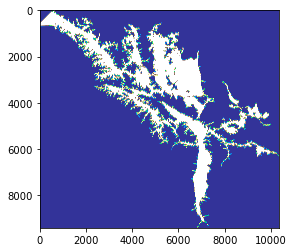

In [3]:
# plot the merged DEM
show(mosaic, cmap='terrain')
plt.show()

In [4]:
output_meta = src.meta.copy()
output_meta.update(
    {"driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": out,
    }
)

In [5]:
out_path = "merge_dem.tif"
with rasterio.open(out_path, "w", **output_meta) as m:
    m.write(mosaic)

# convert .tif to .asc
import os
os.system('gdal_translate -of AAIGrid merge_dem.tif merge_dem_.asc')


Input file size is 10333, 9407
0...10...20...30...40...50...60...70...80...90...100 - done.


0

In [ ]:
# convert .tif to .asc
import os
os.system('gdal_translate -of AAIGrid merge_dem.tif merge_dem_.asc')

In [ ]:
# Define the output file name
output_filename = "merged_dem.asc"

# Write the mosaic to a new ASCII DEM file
with rasterio.open(
        output_filename,
        'w',
        driver='AAIGrid',  # This specifies the ASCII Grid format
        height=mosaic.shape[1],
        width=mosaic.shape[2],
        count=1,
        dtype=mosaic.dtype,
        # crs=src_files_to_mosaic[0].crs,
        transform=out,
) as out_file:
    out_file.write(mosaic[0], 1)



In [ ]:
output_meta = raster.meta.copy()
output_meta.update(
    {"driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": output,
    }
)

In [ ]:
def merge_dems(dem_paths, output_filename):
    """
    Merge multiple DEMs into a single file.

    Parameters
    ----------
    dem_paths : list
        A list of file paths to the DEMs to be merged.
    output_filename : str
        The file path to the output file.

    Returns
    -------
    None
    """

    # import the necessary modules
    import rasterio
    from rasterio.merge import merge

    # merge the DEMs
    src_files_to_mosaic = []
    for fp in dem_paths:
        swap_header(fp) # swap the header of the DEM if necessary
        src = rasterio.open(fp + '_new')   # open the new DEM
        src_files_to_mosaic.append(src)   # append the DEM to the list of DEMs to be merged
        mosaic, out = merge(src_files_to_mosaic)  # merge the DEMs

    # Write the mosaic to a new ASCII DEM file
    with rasterio.open(
            output_filename,
            'w',
            driver='AAIGrid',  # This specifies the ASCII Grid format
            height=mosaic.shape[1],
            width=mosaic.shape[2],
            count=1,
            dtype=mosaic.dtype,
            crs=src_files_to_mosaic[0].crs,
            transform=out,
    ) as out_file:
        out_file.write(mosaic[0], 1)

In [ ]:
merge_dems(dem_paths, "merged_dem.asc")
